# Исследование надежности заемщиков


## Оглавление

1. [Введение](#intro)
2. [Открытие данных](#open)
3. [Предобработка данных](#preprocessing)
    1. [Обработка пропусков](#null)
    2. [Обработка аномальных значений](#anomalies)
    3. [Обработка пропусков в трудовом стаже](#null_days_employeed)
    4. [Изменение типов данных](#types)
    5. [Обработка дубликатов](#duplicates)
    6. [Категоризация данных](#categorization)
4. [Анализ данных](#analys)
    1. [Анализ зависимости возврата кредита от количества детей](#children)
    2. [Анализ зависимости возврата кредита от семейного положения](#family_status)
    3. [Анализ зависимости возврата кредита от уровня дохода](#income)
    4. [Анализ зависимости возврата кредита от целей кредита](#purpose)
5. [Общий вывод](#total)

## Введение <a id="intro"></a>

Задача:
- На основе статистики о платёжеспособности клиентов исследовать, влияет ли семейное положение и количество детей клиента на факт возврата кредита в срок.

## Открытие данных <a id="open"></a>

Импортируем библиотеки, необходимые для работы.

In [1]:
import pandas as pd
import seaborn as sns

Откроем файл с данными, и выведем первые 10 строк.

In [2]:
data = pd.read_csv('data.csv')
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем основную информацию о датафрейме.

In [3]:
display(data.info())
data.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
children,21525.0,NaN,NaN,NaN,0.538908,1.381587,-1.0,0.0,0.0,1.0,20.0
days_employed,19351.0,NaN,NaN,NaN,63046.497661,140827.311974,-18388.949901,-2747.423625,-1203.369529,-291.095954,401755.400475
dob_years,21525.0,NaN,NaN,NaN,43.29338,12.574584,0.0,33.0,42.0,53.0,75.0
education,21525,15,среднее,13750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_id,21525.0,NaN,NaN,NaN,0.817236,0.548138,0.0,1.0,1.0,1.0,4.0
family_status,21525,5,женат / замужем,12380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_status_id,21525.0,NaN,NaN,NaN,0.972544,1.420324,0.0,0.0,0.0,1.0,4.0
gender,21525,3,F,14236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income_type,21525,8,сотрудник,11119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
debt,21525.0,NaN,NaN,NaN,0.080883,0.272661,0.0,0.0,0.0,0.0,1.0


## Предобработка данных <a id="preprocessing"></a>

### Обработка пропусков <a id="null"></a>

Выведем количество пропущенных значений для каждого столбца.

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения:
- `days_employed` - пропуски в этом столбце обработаем позже.
- `total_income` - хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце можно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` может быть заполнен медианным доходом среди всех записей с тем же типом.

Заполним пропуски в данных о доходах по способу, описанному выше.

In [5]:
for t in data['income_type'].unique():
    data.loc[
        (data['income_type'] == t) & (data['total_income'].isna()), 'total_income'
    ] = data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений  <a id="anomalies"></a>

#### Обработка аномалий в трудовом стаже

При открытии датасета были заметны значения с отрицательным количеством дней трудового стажа в столбце `days_employed`. Заменим их положительными значениями с помощью модуля.

In [6]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится далее для исследования.

#### Обработка аномалий в количестве детей

Выведем список уникальных значений количества детей.

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

В столбце с количеством детей есть два аномальных значения (-1 и 20). Удалим строки, в которых встречаются такие аномальные значения из датафрейма.

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

### Обработка пропусков в трудовом стаже <a id="null_days_employeed"></a>

Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.

In [10]:
for t in data['income_type'].unique():
    data.loc[
        (data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'
    ] = data.loc[(data['income_type'] == t), 'days_employed'].median()

Проверим, что все пропуски заполнены. Выведем количество пустых значений в столбцах датасета.

In [11]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных <a id="types"></a>

Заменим вещественный тип данных в столбце `total_income` на целочисленный `int`.

In [12]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов <a id="duplicates"></a>

#### Обработка явных дубликатов

Выведем на экран количество строк-дубликатов в данных. 

In [13]:
data.duplicated().sum()

54

В данных присутствует 54 явных дубликата. Удалим их из датасета.

In [14]:
data = data.drop_duplicates()

#### Обработка неявных дубликатов

При первичном открытии данных были заметны одинаковые значения образования, записанные разным регистром. Приведем весь столбец `education` к нижнему регистру.

In [15]:
data['education'] = data['education'].str.lower()

### Категоризация данных <a id="categorization"></a>

#### Добавление категорий дохода

Выделим в датафрейме следующие категории дохода:
- `E` - доход 0–30000;
- `D` - 30001–50000;
- `C` - 50001–200000;
- `B` - 200001–1000000;
- `A` - 1000001 и выше.

In [16]:
def categorize_income(income):
    '''
    функция принимает: значение дохода клиента
    функция возвращает: категорию дохода
    '''
    # конструкция try-except использована на случай отличающихся значений от входящих в категории
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass
    
# добавляем столбец с категориями дохода
data['total_income_category'] = data['total_income'].apply(categorize_income)

#### Добавление категории целей кредита

Выведем список уникальных целей взятия кредита из столбца `purpose`.

In [17]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Можно выделить следующие категории целей кредита:
- `операции с автомобилем`,
- `операции с недвижимостью`,
- `проведение свадьбы`,
- `получение образования`.

Разделим все цели кредита по категориям, описанным выше.

In [18]:
def categorize_purpose(purpose):
    '''
    функция принимает: цель кредита из датасета
    функция возвращает: категорию цели цредита
    '''
    try:
        # если текст цели содержит определенные части слов, то возвращаем категорию, связанную с ними 
        if 'автом' in purpose:
            return 'операции с автомобилем'
        elif 'жил' in purpose or 'недвиж' in purpose:
            return 'операции с недвижимостью'
        elif 'свад' in purpose:
            return 'проведение свадьбы'
        elif 'образов' in purpose:
            return 'получение образования'
    except:
        # если в тексте цели нет ни одной части слов, свзанной с категориями, то возаращаем соответствующее значение
        return 'нет категории'
    
# добавляем столбец с категориями целей кредита
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Анализ данных <a id="analys"></a>

Для начала проверим, какие значения записаны в столбце статуса возврата кредита.

In [19]:
data.debt.unique()

array([0, 1])

Аномалий нет. В строках значения только `0` и `1`, поэтому с данными можно работать.

### Анализ зависимости возврата кредита от количества детей <a id="children"></a>

Cоздадим отдельную таблицу, в которой посчитаем:
1. Количество клиентов с разным количеством детей.
2. Количество имеющих задолженности среди них. 

In [20]:
def get_table_grouped(data, column):
    '''
    функция принимает: датасет и название колонки, по которой группируем клиентов и считаем должников
    функция возвращает: таблица с количеством клиентов каждой категории и количество должников среди них
    '''
    # переименуем столбцы, чтобы было удобнее понимать их смысл
    # сбросим индексы, т.к. по умолчанию индексами будет столбец со значениями колонки-признака
    return data.groupby(column).agg({
        column: 'count', 
        'debt': 'sum'
    }).rename(columns={
        column: 'people_count', 
        'debt': 'debt_count'}).reset_index()

# получаем таблицу
children_grouped = get_table_grouped(data, 'children')

# выведем таблицу на экран
# добавляем заливку цветом
children_grouped.style.background_gradient(cmap='BuGn')

,children,people_count,debt_count
0,0,14107,1063
1,1,4809,444
2,2,2052,194
3,3,330,27
4,4,41,4
5,5,9,0


Судя по таблице, в некоторых категориях значительно мало клиентов. Например, клиентов с 5 детьми всего 9. Посчитаем процент клиентов в каждой категории, чтобы понять, стоит ли доверять данной выборке и можно ли сделать по ней точные выводы.

In [21]:
def get_people_percent(people_count):
    '''
    функция принимает: столбец с количеством клиентов в каждой категории
    функция выводит: столбец с процентом клиентов в каждой категории, относительно общего количества
    '''
    return people_count / people_count.sum() * 100

# добавим столбец с процентом клиентов в каждой группе, относительно всей выборки
children_grouped['people_percent'] = get_people_percent(children_grouped['people_count'])

# выведем таблицу на экран
children_grouped.style.background_gradient(cmap='BuGn')

,children,people_count,debt_count,people_percent
0,0,14107,1063,66.081132
1,1,4809,444,22.526700
2,2,2052,194,9.612142
3,3,330,27,1.545812
4,4,41,4,0.192055
5,5,9,0,0.042159


Так как клиентов с 4 и 5 детьми меньше 1 процента, то можем объединить их с клиентами с 3 детьми.

In [22]:
# суммируем строки с категориями, где количество детей от 3 до 5
children_grouped.loc[3] = children_grouped.loc[3:5].sum()
# переименуем количество детей в суммированной строке
children_grouped.loc[3, 'children'] = '3+'
# удалим строки, где количество детей было 4 и 5
children_grouped = children_grouped.drop([4,5])

Посчитаем процент клиентов, имеющих задолженности, в каждой группе. Построим столбчатую диаграмму, чтобы наглядно визуализировать процент должников.

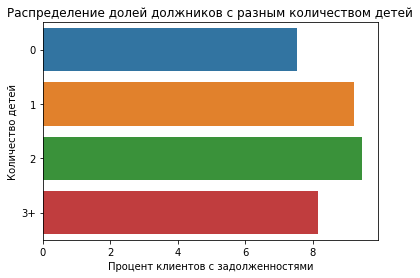

In [23]:
def get_debt_percent(table_grouped):
    '''
    функция принимает: таблицу с количеством клиентов и должников в разных категориях
    функция выводит: столбец с процентами должников в каждой категории
    '''
    return table_grouped['debt_count'] / table_grouped['people_count'] * 100

# добавим столбец с процентом должников в каждой группе
children_grouped['debt_percent'] = get_debt_percent(children_grouped)

# генерируем график 
# строим в горизонтальной ориентации, чтобы было удобнее читать график
ax = sns.barplot(x=children_grouped['debt_percent'], y=children_grouped['children'], orient='h');

# добавляем подписи
ax.set_title('Распределение долей должников с разным количеством детей')
ax.set(xlabel='Процент клиентов с задолженностями', ylabel='Количество детей');

**Вывод:** 
- Лучше всего платят кредиты клиенты без детей. Среди них имели задолженности примерно 7.5% клиентов. 
- Среди клиентов с детьми лучше всего возвращают кредиты клиенты, у которых 3 детей и больше. Среди них задолженности были у примерно 8.2% клиентов.
- Больше всего задолженностей имели клиенты с 1 и 2 детьми. Среди них задолженности были у 9.2% и 9.5% клиентов соответственно.

### Анализ зависимости возврата кредита от семейного положения <a id="family_status"></a>

Для начала проверим, какие значения семейного положения имеются в датасете.

In [24]:
data.family_status.unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

Аномальных значений нет, поэтому с данными можно работать.

Cоздадим отдельную таблицу, в которой посчитаем:
1. Количество клиентов в каждом статусе семейного положения.
2. Количество имеющих задолженности среди них.
3. Процент клиентов в каждой категории, относительно всей выборки.

In [25]:
# создаем таблицу
family_grouped = get_table_grouped(data, 'family_status')
family_grouped['people_percent'] = get_people_percent(family_grouped['people_count'])

# выводим ее на экран с закрашиванием цветом
family_grouped.style.background_gradient(cmap='BuGn')

,family_status,people_count,debt_count,people_percent
0,Не женат / не замужем,2796,273,13.097246
1,в разводе,1189,84,5.569608
2,вдовец / вдова,951,63,4.454750
3,гражданский брак,4146,385,19.421023
4,женат / замужем,12266,927,57.457373


В каждой категории довольно много клиентов, поэтому по данным можем сделать более точные выводы.

Посчитаем процент клиентов, имеющих задолженности, в каждой группе. Отсортируем их в порядке убывания. Построим столбчатую диаграмму, чтобы наглядно визуализировать процент должников в каждой категории.

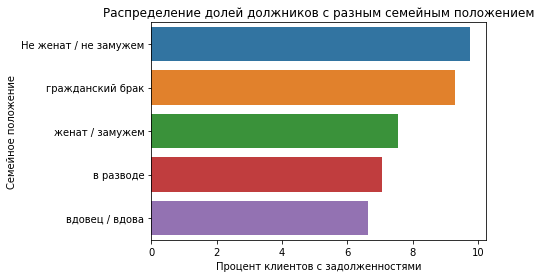

In [26]:
# добавим столбец с процентом должников в каждой группе
family_grouped['debt_percent'] = get_debt_percent(family_grouped)

# отсортируем таблицу в порядке убывания по проценту задолженностей в каждой категории
family_grouped = family_grouped.sort_values(by='debt_percent', ascending=False)

# строим график в горизонтальной ориентации
ax = sns.barplot(x=family_grouped['debt_percent'], y=family_grouped['family_status'], orient='h')

# добавляем подписи
ax.set_title('Распределение долей должников с разным семейным положением')
ax.set(xlabel='Процент клиентов с задолженностями', ylabel='Семейное положение');

**Вывод:** 
- Лучше всего платят кредиты вдовцы и вдовы. Среди них имели задолженности примерно 6.6% клиентов.
- Чаще всего задолженности встречаются у неженатых/незамужних клиентов или находящихся в гражданском браке. Среди них задолженности были примерно у 9.8% и 9.3% клиентов соответственно. 

### Анализ зависимости возврата кредита от уровня дохода <a id="income"></a>

Cоздадим отдельную таблицу, в которой посчитаем:
1. Количество клиентов в каждой категории дохода.
2. Количество имеющих задолженности среди них.
3. Процент клиентов в каждой категории, относительно всей выборки.

In [27]:
# генерируем таблицу с количеством клиентов и должников с разными категориями дохода
# сортируем по убыванию категорий, т.е. от малого дохода к большему
income_grouped = get_table_grouped(data, 'total_income_category').sort_values(
    by='total_income_category', ascending=False
).reset_index()

# добавим столбец с процентом клиентов в каждой группе, относительно всей выборки
income_grouped['people_percent'] = get_people_percent(income_grouped['people_count'])

# выведем таблицу на экран, добавим закрашивание
income_grouped.style.background_gradient(cmap='BuGn')

,index,total_income_category,people_count,debt_count,people_percent
0,4,E,22,2,0.103054
1,3,D,349,21,1.634814
2,2,C,15938,1353,74.658048
3,1,B,5014,354,23.486978
4,0,A,25,2,0.117107


По таблице видно, что в некоторых категориях значительно мало клиентов. Например, в категории дохода E всего 22 клиента. 

Посчитаем процент клиентов, имеющих задолженности, в каждой группе. Построим столбчатую диаграмму, чтобы наглядно визуализировать процент должников в каждой категории.

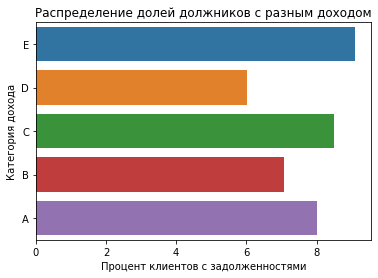

In [28]:
# добавляем столбец с процентом должников
income_grouped['debt_percent'] = get_debt_percent(income_grouped)

# строим график в горизонтальной ориентации
ax = sns.barplot(x=income_grouped['debt_percent'], y=income_grouped['total_income_category'], orient='h')

# добавляем подписи
ax.set_title('Распределение долей должников с разным доходом')
ax.set(xlabel='Процент клиентов с задолженностями', ylabel='Категория дохода');

**Вывод:** 
- Лучше всего платят кредиты клиенты в категории D. Среди них задолженности имели примерно 6% клиентов. При этом общий процент клиентов в этой категории очень невелик - всего 1.6% от общего числа кредитных клиентов банка.
- Чаще всего имею задолженности клиенты в категориях Е и C. Среди них задолженности были примерно у 9.1% и 8.5% клиентов соответственно. 
    - При этом в категории Е процент клиентов очень мал - всего 0.1% от общего числа, поэтому выводы могут быть не точными. 
    - Также в категории С клиентов больше всего - 74.7% от общего числа, поэтому совсем не давать кредиты этой категории в будущем будет не правильно, банк может потерять большую часть клиентов.
- Также можно отметить, что процент клиентов в категории А тоже очень мал - 0.1% от общего числа, поэтому полученные показатели в этой категории тоже могут мешать делать точные выводы.

### Анализ зависимости возврата кредита от целей кредита <a id="purpose"></a>

Cоздадим отдельную таблицу, в которой посчитаем:
1. Количество клиентов в каждой категории цели.
2. Количество имеющих задолженности среди них.
3. Процент клиентов в каждой категории, относительно всей выборки.

In [29]:
# получаем таблицу
purpose_grouped = get_table_grouped(data, 'purpose_category')
purpose_grouped['people_percent'] = get_people_percent(purpose_grouped['people_count'])

# выведем таблицу на экран
purpose_grouped.style.background_gradient(cmap='BuGn')

,purpose_category,people_count,debt_count,people_percent
0,операции с автомобилем,4281,400,20.053401
1,операции с недвижимостью,10754,780,50.374742
2,получение образования,3989,369,18.685591
3,проведение свадьбы,2324,183,10.886266


Количество клиентов в каждой категории довольно большое, относительно общего числа, поэтому более точно можем не считать этот показатель.

Посчитаем процент клиентов, имеющих задолженности, в каждой группе. Отсортируем таблицу в порядке его убывания. Построим столбчатую диаграмму, чтобы наглядно визуализировать процент должников в каждой категории.

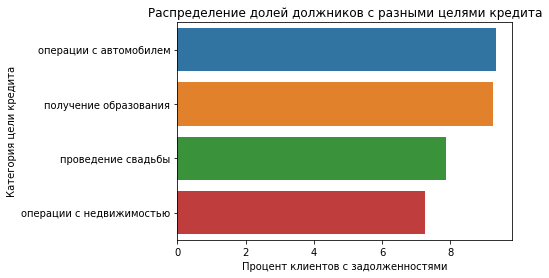

In [30]:
# добавим столбец с процентом должников в каждой группе
purpose_grouped['debt_percent'] = get_debt_percent(purpose_grouped)

# отсортируем таблицу в порядке убывания по проценту задолженностей в каждой категории
purpose_grouped = purpose_grouped.sort_values(by='debt_percent', ascending=False)

# строим график в горизонтальной ориентации
ax = sns.barplot(x=purpose_grouped['debt_percent'], y=purpose_grouped['purpose_category'], orient='h')

# добавляем подписи
ax.set_title('Распределение долей должников с разными целями кредита')
ax.set(xlabel='Процент клиентов с задолженностями', ylabel='Категория цели кредита');

**Вывод:** 
- Лучше всего платят кредиты клиенты, которые оформляют их на операции с недвижимостью. Среди них задолженности имеют примерно 7.3% клиентов. 
    - Также можно отметить, что в этой категории проходит максимальное количество операций, примерно половина от общего числа.
- Чаще всего задолженности встречаются у кредитов, которые клиенты оформляют на операции с автомобилем или получение образования. Среди них задолженности были примерно у 9.3% в каждой категории.

## Общий вывод <a id="total"></a>

### Вывод о данных

- Данных было достаточно большое количество - 21525 строк, поэтому в большинстве случаев это позволило сделать более точные выводы. 
- В некоторых местах присутствовали пропуски и аномальные значения. Так как строк с такими данными было довольно много, то пришлось их поправить. 
    - Было пропущено 2174 значения в полях с трудовым стажем и уровнем дохода. Возможно, причина пропуска данных имеет полностью случайный характер. Вероятность встретить пропуск не зависела от других значений. Скорее всего, причиной пропусков может быть человеческий фактор. Клиенты могли пропустить заполнение этих полей при оформлени кредита, тем более если их заполнение могло быть необзятальным.
    - Удалить прощенные значения мы не могли, так как потеряли бы большую часть данных (примерно 10%), поэтому заменили их медианными значениями от зависимых категорий. Медиана показывает значение, которое находится ровно посередине отсортированной выборки. Это более реалистичный показатель, который не зависит от аномально отличающихся данных в выборке (например, слишком больших или слишком маленьких значений).

### Ответы на вопросы заказчика

Ответы на поставленные вопросы были получены. Зависимости между категориями клиентов и задолженностям по кредитам есть, но в большинстве случаев разница между ними незначительная +- 2%. 

##### Есть ли зависимость между количеством детей и возвратом кредита в срок?
- Да. Лучше всего платят кредиты клиенты без детей (должников в категории 7.5%). Больше всего задолженностей у клиентов с 1 и 2 детьми (процент должников в категории 9.2% и 9.5% соответственно).

##### Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Да. Лучше всего платят вдовцы и вдовы (должников в категории 6.6%). Больше всего задолженностей у неженатых/незамужних клиентов или находящихся в гражданском браке (процент должников в категории 9.8% и 9.3% соответственно).

##### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Да. Лучше всего платят клиенты в категории D (должников в категории 6%). Больше всего задолженностей у клиентов с категориями доходов Е и С (процент должников в категории 9.1% и 8.5% соответственно. При этом общий процент клиентов в некоторых категориях очень мал (в D всего 1.6% клиентов, в А и Е всего 0.1% от общего числа), поэтому выводы могут быть не точными.

##### Как разные цели кредита влияют на его возврат в срок?
- Лучше всего клиенты выплачивают кредиты клиенты, оформленные на операции с недвижимостью (должников в категории 7.3%). Больше всего всего задолженностей по кредитам, оформленным на операции с автомобилем или получение образования (процент должников в категориях примерно 9.3%).

##### Дополнительные рекомендации:
- В дальнейшем будет полезно более точно разобраться в причинах пропущенных значений трудового стажа и уровня дохода у некоторых клиентов, чтобы подобные ошибки не проявлялись в будущем, и была возможность делать более точные анализы.